In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.patches import Patch
import glob
import os
from google.colab import drive

drive.mount('/content/drive')

path = "/content/drive/MyDrive/Copy of fiber_data.csv"
df = pd.read_csv(path)

df.head()





Mounted at /content/drive


,image_id,item_id,image_num,label,website,title,price,image
0,1,1,1,Acrylic,Gap,Sheer Rib Henley Sweater,$69.95,https://www1.assets-gap.com/webcontent/0059/97...
1,2,1,2,Acrylic,Gap,Sheer Rib Henley Sweater,$69.95,https://www1.assets-gap.com/webcontent/0060/01...
2,3,1,3,Acrylic,Gap,Sheer Rib Henley Sweater,$69.95,https://www1.assets-gap.com/webcontent/0059/97...
3,4,1,4,Acrylic,Gap,Sheer Rib Henley Sweater,$69.95,https://www1.assets-gap.com/webcontent/0060/77...
4,5,1,5,Acrylic,Gap,Sheer Rib Henley Sweater,$69.95,https://www1.assets-gap.com/webcontent/0060/77...


## Number of Products per Fabric Type (Bar Chart):




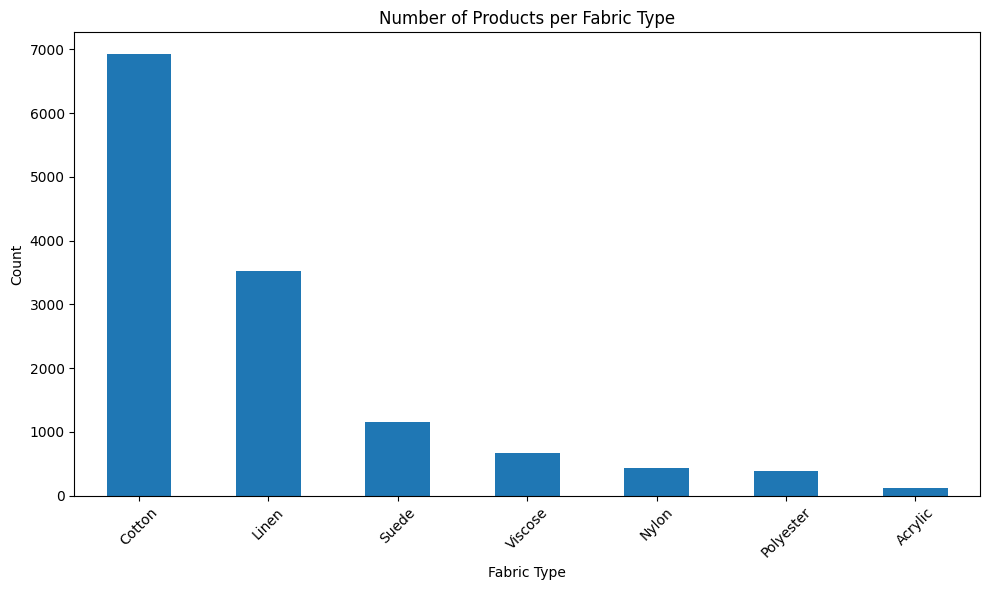

In [ ]:
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar')

plt.title("Number of Products per Fabric Type")
plt.xlabel("Fabric Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Number of Products per Website (Bar Chart)

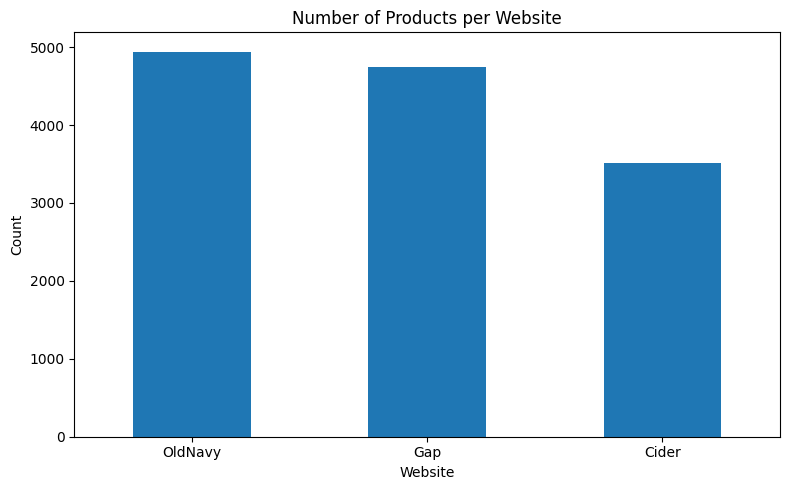

In [ ]:
plt.figure(figsize=(8, 5))
df['website'].value_counts().plot(kind='bar')

plt.title("Number of Products per Website")
plt.xlabel("Website")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Distribution of Prices by Fabric Type (Boxplot)

<Figure size 1200x600 with 0 Axes>

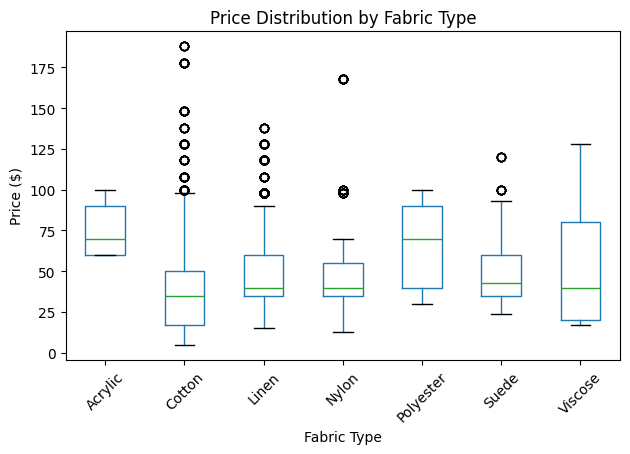

In [ ]:
plt.figure(figsize=(12, 6))

# Clean and convert 'price' column to numeric
# Check if the column is already numeric to avoid errors if the cell is run multiple times
if df['price'].dtype == 'object':
    df['price'] = df['price'].str.replace('$', '', regex=False).astype(float)

df.boxplot(column='price', by='label', grid=False)

plt.title("Price Distribution by Fabric Type")
plt.suptitle("")   # removes automatic pandas title
plt.xlabel("Fabric Type")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Histogram of Price Distribution (All Products)

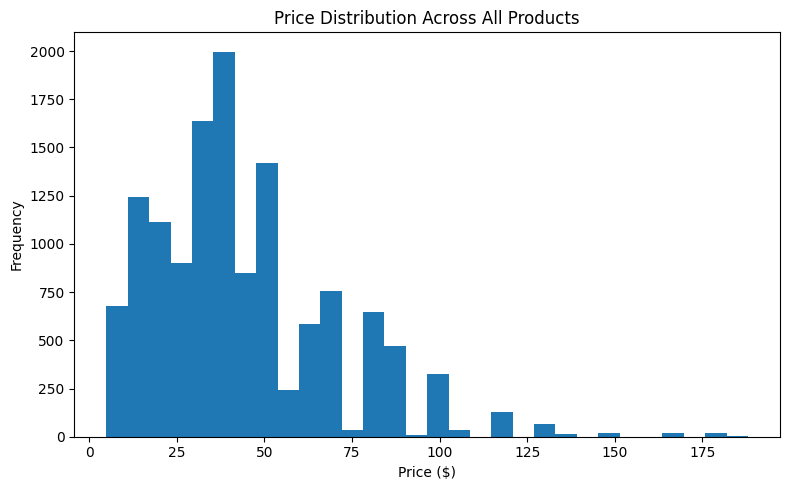

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=30)

plt.title("Price Distribution Across All Products")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


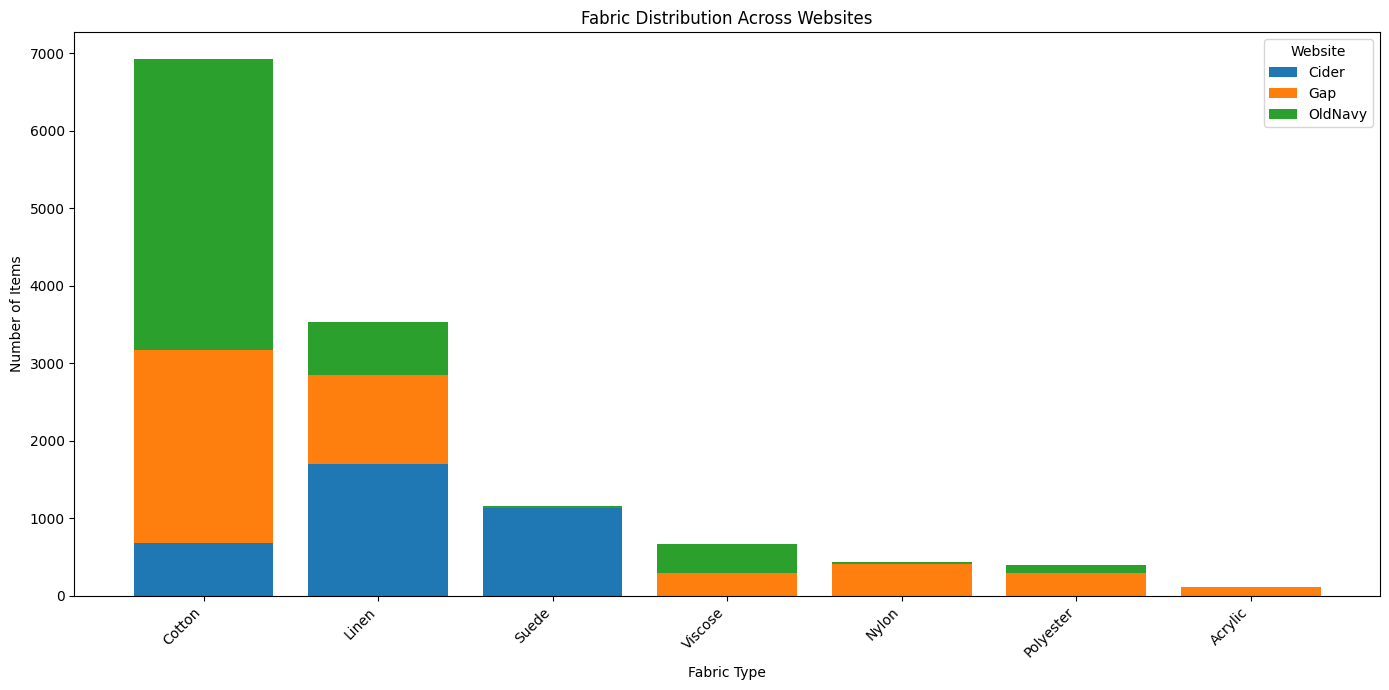

In [ ]:
# Group rare labels
min_fraction = 0.01
label_counts = df['label'].value_counts(normalize=True)
rare_labels = label_counts[label_counts < min_fraction].index.tolist()

if len(rare_labels) > 0:
    df['label_grouped'] = df['label'].where(~df['label'].isin(rare_labels), other='Acrylic')
else:
    df['label_grouped'] = df['label']

# Create contingency table
ct = pd.crosstab(df['label_grouped'], df['website'])

# Sort fabrics by total count (descending)
ct['total'] = ct.sum(axis=1)
ct = ct.sort_values(by='total', ascending=False)
ct = ct.drop(columns='total')  # remove total column before plotting


# Plot
plt.figure(figsize=(14, 7))
bottom = [0] * len(ct.index)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, website in enumerate(ct.columns):
    plt.bar(
        ct.index,
        ct[website],
        bottom=bottom,
        label=website,
        color=colors[i % len(colors)]
    )
    bottom = bottom + ct[website]  # update stacking baseline

plt.title("Fabric Distribution Across Websites")
plt.ylabel("Number of Items")
plt.xlabel("Fabric Type")
plt.xticks(rotation=45, ha='right')

plt.legend(title="Website")
plt.tight_layout()
plt.show()